In [60]:
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.manifold import TSNE

In [61]:
df = pd.read_csv("data/cosmeticos.csv")

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           1472 non-null   object 
 1   Marca          1472 non-null   object 
 2   Nome           1472 non-null   object 
 3   Preco          1472 non-null   int64  
 4   Rating         1472 non-null   float64
 5   Ingredientes   1472 non-null   object 
 6   Pele_Mista     1472 non-null   int64  
 7   Pele_Seca      1472 non-null   int64  
 8   Pele_Normal    1472 non-null   int64  
 9   Pele_Oleosa    1472 non-null   int64  
 10  Pele_Sensivel  1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB


In [63]:
df.head()

,Tipo,Marca,Nome,Preco,Rating,Ingredientes,Pele_Mista,Pele_Seca,Pele_Normal,Pele_Oleosa,Pele_Sensivel
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


## Exploratory Data Analysis


In [64]:
# Transform values from column "Ingredientes" to a new dataframe
df_ingredientes = (
    df["Ingredientes"]
    .str.split(",")
    .map(lambda x: [i.strip() for i in x])
    .explode("Ingredientes")
)
df_ingredientes

0              Algae (Seaweed) Extract
1                          Mineral Oil
2                           Petrolatum
3                             Glycerin
4                        Isohexadecane
                     ...              
45811           Alpha-isomethyl Ionone
45812                 CI 14700 (Red 4)
45813              CI 19140 (Yellow 5)
45814               CI 42090 (Blue 1).
45815    Visit the DERMAFLASH boutique
Name: Ingredientes, Length: 45816, dtype: object

In [65]:
df.describe()

,Preco,Rating,Pele_Mista,Pele_Seca,Pele_Normal,Pele_Oleosa,Pele_Sensivel
count,1472.000000,1472.000000,1472.00000,1472.000000,1472.000000,1472.000000,1472.000000
mean,55.584239,4.153261,0.65625,0.614130,0.652174,0.607337,0.513587
std,45.014429,0.633918,0.47512,0.486965,0.476442,0.488509,0.499985
min,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,42.500000,4.300000,1.00000,1.000000,1.000000,1.000000,1.000000
75%,68.000000,4.500000,1.00000,1.000000,1.000000,1.000000,1.000000
max,370.000000,5.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [66]:
tipo_percentual = df.value_counts("Tipo", normalize=True) * 100
tipo_percentual = tipo_percentual.reset_index()
tipo_percentual.columns = ["Tipo", "Percentual"]

fig = px.bar(
    tipo_percentual,
    x="Tipo",
    y="Percentual",
    color="Tipo",
    title="Percentual de produtos por tipo",
    labels={"Tipo": "Tipo de produto", "Percentual": "Percentual (%)"},
)
fig.update_traces(texttemplate="%{y:.2f}%", textposition="outside")

In [67]:
marca_percentual = df.value_counts("Marca", normalize=True) * 100
marca_percentual = marca_percentual.reset_index()
marca_percentual.columns = ["Marca", "Percentual"]

fig = px.bar(
    marca_percentual.head(10),
    x="Percentual",
    y="Marca",
    color="Marca",
    title="Percentual de produtos por marca",
    labels={"Marca": "Marca de produto", "Percentual": "Percentual (%)"},
    orientation="h",
)
fig.update_traces(texttemplate="%{x:.2f}%", textposition="outside")

In [68]:
num_of_brands = len(df["Marca"].unique())
print(f"Number of brands: {num_of_brands}")

Number of brands: 116


In [69]:
num_of_ingredients = len(df_ingredientes.unique())
print(f"Number of ingredients: {num_of_ingredients}")

Number of ingredients: 6493


In [70]:
ingrediente_percentual = df_ingredientes.value_counts(normalize=True) * 100
ingrediente_percentual = ingrediente_percentual.reset_index()
ingrediente_percentual.columns = ["Ingrediente", "Percentual"]

fig = px.bar(
    ingrediente_percentual.head(10),
    x="Percentual",
    y="Ingrediente",
    color="Ingrediente",
    title="Percentual de ingredientes",
    labels={"Ingrediente": "Ingrediente", "Percentual": "Percentual (%)"},
    orientation="h",
)
fig.update_traces(texttemplate="%{x:.2f}%", textposition="outside")

In [71]:
px.histogram(df["Preco"], title="Distribuição de preços")

In [72]:
px.histogram(df["Rating"], title="Distribuição de avaliações")

In [73]:
px.box(
    df,
    x="Preco",
    y="Tipo",
    title="Preço por tipo de produto",
    color="Tipo",
    orientation="h",
    hover_data=["Marca", "Nome"],
)

In [74]:
px.box(
    df,
    x="Rating",
    y="Tipo",
    title="Avaliação por tipo de produto",
    color="Tipo",
    orientation="h",
    hover_data=["Marca", "Nome"],
)

In [75]:
px.scatter(
    df,
    x="Preco",
    y="Rating",
    title="Preço x Avaliação",
    color="Tipo",
    hover_data=["Marca", "Nome"],
)

<Axes: >

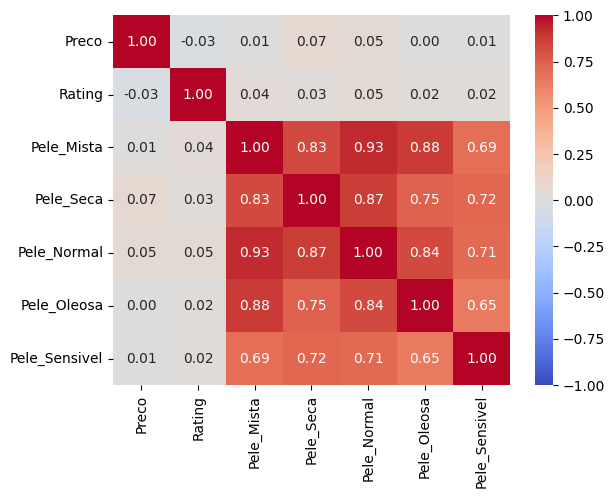

In [76]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    vmin=-1,
    vmax=1,
)

## Training the model


In [77]:
X = df.copy()

# Drop columns that won't be used
X.drop(columns=["Nome", "Ingredientes"], axis=1, inplace=True)

In [78]:
numeric_features = ["Rating", "Preco"]
categorical_features = ["Marca", "Tipo"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(), categorical_features),
    ],
    remainder="passthrough",
)

In [79]:
X_transformed = preprocessor.fit_transform(X)
print(f"Shape of transformed data (rows, columns): {X_transformed.shape}")

Shape of transformed data (rows, columns): (1472, 129)


In [80]:
# Store the results of t-SNE in a dataframe to plot
df_results = pd.DataFrame()
df_results_3d = pd.DataFrame()

In [81]:
for perplexity in range(5, 51):
    # Create and train the model
    tsne = TSNE(
        n_components=2,
        perplexity=perplexity,
        init="random",
        max_iter=250,
        random_state=51,
    )
    X_embedded = tsne.fit_transform(X_transformed)

    # Store the results in the dataframe
    df_tmp = pd.DataFrame(X_embedded, columns=["Component 1", "Component 2"])
    df_tmp["Perplexity"] = perplexity
    df_results = pd.concat([df_results, df_tmp], axis=0)

In [82]:
for perplexity in range(5, 51):
    # Create and train the model
    tsne = TSNE(
        n_components=3,
        perplexity=perplexity,
        init="random",
        max_iter=250,
        random_state=51,
    )
    X_embedded = tsne.fit_transform(X_transformed)

    # Store the results in the dataframe
    df_tmp = pd.DataFrame(
        X_embedded, columns=["Component 1", "Component 2", "Component 3"]
    )
    df_tmp["Perplexity"] = perplexity
    df_results = pd.concat([df_results_3d, df_tmp], axis=0)

In [83]:
df_results.reset_index(drop=True, inplace=True)
df_results_3d.reset_index(drop=True, inplace=True)

## Visualizing the results


In [84]:
px.scatter(
    df_results,
    x="Component 1",
    y="Component 2",
    animation_frame="Perplexity",
    title="t-SNE",
)

In [85]:
px.scatter_3d(
    df_results,
    x="Component 1",
    y="Component 2",
    z="Component 3",
    animation_frame="Perplexity",
    title="t-SNE",
)